## Review sentiment analysis 2
#### Sentiment analysis using Vader on the entire review dataset.


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

RANDOM_STATE= 42

In [2]:
import geopandas as gpd
import altair as alt
from nltk.sentiment.vader import SentimentIntensityAnalyzer


### Get estimated polarity scores

Here, we use **Vader** (Valence Aware Dictionary for sEntiment Reasoning) to estimate the polarity scores on the original listing comments based on the comparison result from review_sentiment_analysis_comparison_with_sample_data.ipynb notebook.

In [3]:
# load cleaned review dataset
review_df = pd.read_pickle('../data/data_cleaned/cleaned_review.zip')
print(review_df.shape)

(375173, 4)


In [4]:
# %%time

# # it takes about 40min to run
# # get polarity scores
# vader_polarity = lambda x: (SentimentIntensityAnalyzer().polarity_scores(x))['compound']
# review_df['polarity'] = review_df['comments'].apply(vader_polarity)

In [5]:
# # save it to a file
# review_df.to_pickle('data/data_cleaned/cleaned_review_with_polarity.zip')

In [6]:
# directly read the saved cleaned_review_with_polarity dataset
review_df = pd.read_pickle('../data/data_cleaned/cleaned_review_with_polarity.zip')
print(review_df.shape)
review_df.head(2)

(375173, 5)


,listing_id,date,reviewer_id,comments,polarity
0,6606,2009-07-17,18085,"The Urban Cottage is comfortable, beautiful, f...",0.9878
1,491958,2012-07-09,2595909,"Jay, Colleen, Mica & Gigi-dog were excellent h...",0.9979


In [7]:
review_df['polarity'].describe()

count    375173.000000
mean          0.848194
std           0.212095
min          -0.995900
25%           0.822500
50%           0.921400
75%           0.963200
max           0.999700
Name: polarity, dtype: float64

### Review sentiment distribution

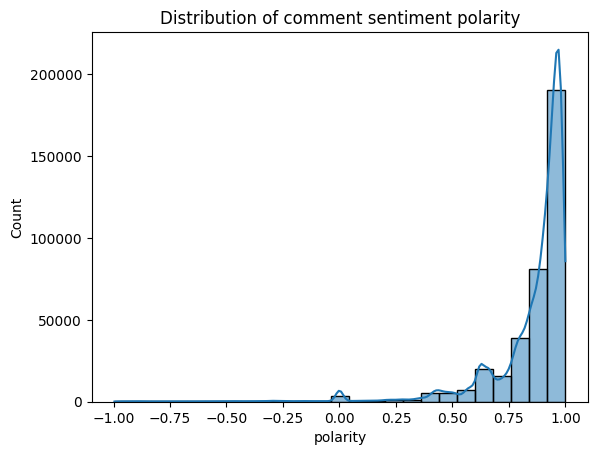

In [8]:
# plot the polarity distribution
sns.histplot(data=review_df, x='polarity', bins=25, kde=True);
plt.title('Distribution of comment sentiment polarity');

###  Review sentiment changes over time

In [9]:
# plot the sentiment changes over time by year for given listings
# notice: altair can only take <=5000 rows, so cannot show all listings at once
def plot_listing_sentiment_over_time(df,listing_id = None):
    sub_df = df[df['listing_id'].isin(listing_id)]
    
    plot = alt.Chart(sub_df, width=500).mark_line().encode(
                x='year(date):T',
                y='mean(polarity)',
                color=alt.Color('listing_id:O', scale=alt.Scale(scheme= 'dark2'))
            ).interactive()
    return plot

# sample plot (plot changes everytime you run the code when removing random_state=RANDOM_STATE)
listing_id_sample = review_df['listing_id'].sample(3,random_state=RANDOM_STATE).values
print(listing_id_sample)
plot_listing_sentiment_over_time(review_df, listing_id_sample)

[2693700 26961134 26804995]


alt.Chart(...)

### Top n most negative/positive reviews 

In [10]:
# check top 3 neg/pos comments by polarity score
def top_n_sentiment_df(df, negative=True, n=3):
    if negative:
        top_n_df = df[df['polarity']<0].sort_values(by='polarity')[:n]
    else:
        top_n_df = df[df['polarity']>0].sort_values(by='polarity',ascending=False)[:n]
    return top_n_df

In [11]:
# top 3 negative comments
top_n_sentiment_df(review_df, negative=True, n=3)

,listing_id,date,reviewer_id,comments,polarity
120454,13607307,2020-06-28,351424654,"TERRIBLE!!! It's dirty, smelly, and in absolut...",-0.9959
301175,42606280,2022-07-16,65978452,I had a terrible experience for my 8 days' sta...,-0.9959
325839,49527497,2022-07-04,86227724,Moe provided check-in instructions on the morn...,-0.9957


In [12]:
# top 3 positive comments
top_n_sentiment_df(review_df,negative=False, n = 3)

,listing_id,date,reviewer_id,comments,polarity
210527,20328571,2019-06-22,9092920,"We so loved our stay in this sweet, cozy Airbn...",0.9997
370786,669678436529427232,2022-09-05,7600403,STAY HERE!!! I absolutely loved everything ab...,0.9997
12950,706385,2020-07-15,9092920,Where to start? This is the second time my hu...,0.9996


### Sentiment by neighborhood

In [13]:
# # prepare data

# # load cleaned listing data
# listing_df = pd.read_pickle('../data/data_cleaned/cleaned_listing.zip')

# # group review data by listing_id
# # combine comments together and get mean polarity score for the same listing_id
# grouped_review = review_df.loc[:,['listing_id','comments','polarity']]\
#                         .groupby('listing_id')\
#                         .agg(lambda x: ' '.join(x) if x.dtype == 'object' else x.mean()).reset_index()
# # print(grouped_review.shape)

# # combine listing_neighbor with grouped_review 
# merged_df = pd.merge(listing_df, grouped_review, on = 'listing_id', how = 'left')

# # save the combined data to a file
# merged_df.to_pickle('data/data_cleaned/cleaned_listing_and_review_with_polarity.zip')

# print(merged_df.shape)
# merged_df.head(2)

In [14]:
# directly read from the cleaned_listing_and_review_with_polarity dataset
merged_df = pd.read_pickle('../data/data_cleaned/cleaned_listing_and_review_with_polarity.zip')
print(merged_df.shape)
merged_df.head(2)

(4933, 73)


,listing_id,listing_url,last_scraped,listing_name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,has_license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_count,amenities_count,host_response_time_encoded,host_operate_years,comments,polarity
0,49113826,https://www.airbnb.com/rooms/49113826,2022-12-24,Private Seattle Getaway Home Near Lake Washing...,A Seattle vacation destination for those from ...,SeaTac International Airport: 14 min drive<br ...,https://a0.muscache.com/pictures/miso/Hosting-...,188538325,https://www.airbnb.com/users/show/188538325,Xiao,2018-05-08,"Seattle, WA",,within an hour,1.0,1.0,1,https://a0.muscache.com/im/pictures/user/32fd3...,Oakland,4,4,"['email', 'phone']",1,1,Rainier View,Rainier Valley,47.510280,-122.246680,Entire home,Entire home/apt,8,4.0,4.0,"[""Hot water"", ""Dining table"", ""Toaster"", ""Refr...",280.0,3,30,3.0,3.0,1125.0,1125.0,3.0,1125.0,1,23,53,83,341,18,7,1,2021-06-22,2022-11-29,4.83,4.89,4.94,4.89,4.89,4.61,4.72,1,0,1,1,0,0,0.98,2.0,53,1,4,Unexpectedly the place was like new home since...,0.817365
1,7455832,https://www.airbnb.com/rooms/7455832,2022-12-24,Classic remodeled in Georgetown,Enjoy your Seattle stay in the vibrant & artis...,Georgetown is a cool neighborhood about three ...,https://a0.muscache.com/pictures/miso/Hosting-...,2144954,https://www.airbnb.com/users/show/2144954,Ryan,2012-04-15,"Seattle, WA",,within an hour,1.0,1.0,0,https://a0.muscache.com/im/pictures/user/a6711...,Greater Duwamish,2,2,"['email', 'phone', 'work_email']",1,0,Georgetown,Other neighborhoods,47.544739,-122.319786,Entire home,Entire home/apt,6,3.0,3.0,"[""Hot water"", ""Crib - available upon request"",...",156.0,1,150,2.0,3.0,1125.0,1125.0,2.1,1125.0,1,17,35,65,329,27,27,3,2022-06-09,2022-12-13,4.89,4.96,4.89,4.93,4.96,4.93,4.93,1,1,2,2,0,0,4.07,2.0,55,1,10,The house is so comfortable and clean. It has ...,0.913648


In [15]:
# select features
selected_features = [ 'neighbourhood_cleansed','polarity',
                    'number_of_reviews', 'review_scores_rating', 
                     'review_scores_accuracy','review_scores_cleanliness', 
                     'review_scores_checkin','review_scores_communication', 
                     'review_scores_location']

# group listing data by neighbourhood 
listing_neighbor = merged_df[selected_features].groupby('neighbourhood_cleansed').mean().reset_index()
# print(listing_neighbor.shape)

# load seattle neighbourhood geojson dataset
seattle_neighbourhoods = gpd.read_file('../data/data_raw/neighbourhoods.geojson')
print(seattle_neighbourhoods.shape)

# merge seattle_neighbourhoods with listing_neighbor
seattle_neighbor = pd.merge(seattle_neighbourhoods,listing_neighbor, left_on = 'neighbourhood', right_on = 'neighbourhood_cleansed')
seattle_neighbor.head(2)

(91, 3)


,neighbourhood,neighbourhood_group,geometry,neighbourhood_cleansed,polarity,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
0,Wallingford,Other neighborhoods,"MULTIPOLYGON (((-122.34731 47.66501, -122.3464...",Wallingford,0.852223,75.136095,4.520710,4.532130,4.518343,4.601006,4.597456,4.578402
1,West Queen Anne,Queen Anne,"MULTIPOLYGON (((-122.35692 47.63959, -122.3569...",West Queen Anne,0.870887,73.469880,4.570602,4.583253,4.579759,4.635181,4.610361,4.634819


####  Color map of polarity score by neighborhood 

In [16]:
# define a colore map function
def plot_seattle_neighborhood_color_map(df, col, n_bin=5):
    if n_bin:
        new_df = df.copy()
        # cut polarity into bins
        new_df[col+'_bin'] = pd.cut(new_df[col], n_bin, precision=2)
        
        ax = new_df.plot(column= col+'_bin', cmap='Greens', figsize=(8,8), legend=True)
        sns.despine(top=True, right=True, left=True, bottom=True)
        ax.tick_params(bottom=False,left=False)
        plt.title('Average {} rating score per neighbourhood (binned)'.format(col));
        plt.show()
    else:
        new_df = df.copy()
        ax = df.plot(column= col, cmap='Greens', figsize=(8,8), legend=True)
        sns.despine(top=True, right=True, left=True, bottom=True)
        ax.tick_params(bottom=False,left=False)
        plt.title('Average {} rating score per neighbourhood'.format(col));
        plt.show()

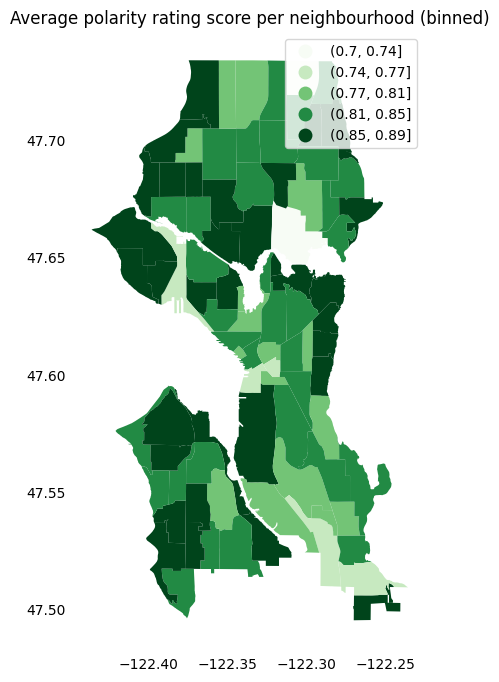

In [17]:
# plot binned colore map of polarity score for each seattle neighborhood
plot_seattle_neighborhood_color_map(seattle_neighbor, 'polarity', n_bin=5)

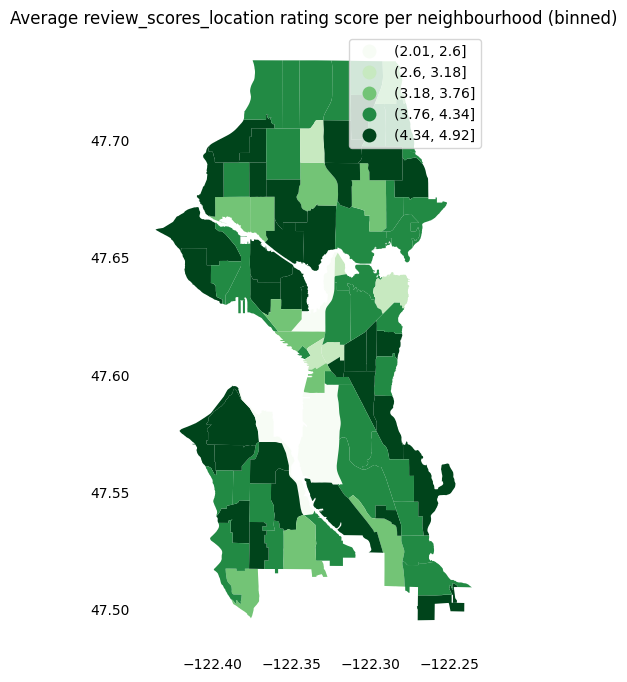

In [18]:
# plot binned colore map of average review score for each seattle neighborhood
plot_seattle_neighborhood_color_map(seattle_neighbor, 'review_scores_location',n_bin=5)  

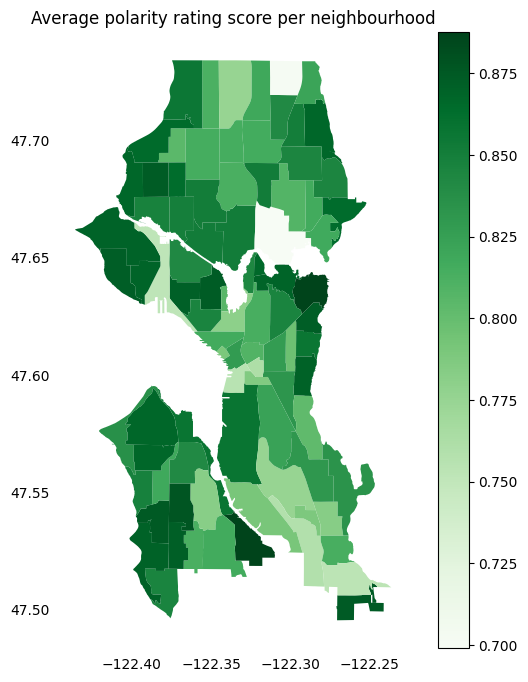

In [19]:
# plot un-binned colore map of polarity score for each seattle neighborhood
plot_seattle_neighborhood_color_map(seattle_neighbor, 'polarity', n_bin=None)  

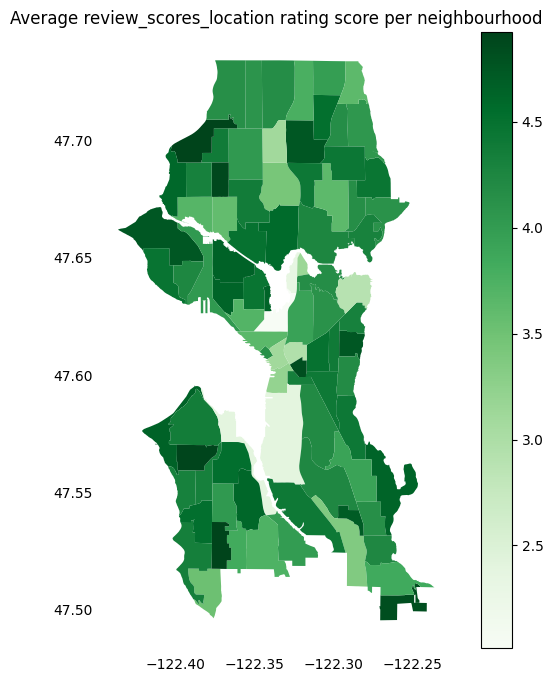

In [20]:
# plot un-binned colore map of average review score for each seattle neighborhood
plot_seattle_neighborhood_color_map(seattle_neighbor, 'review_scores_location', n_bin=None)  

In [21]:
# get top n neighborhod
def get_top_n_neighborhood(df,col,n=5, negative=False):
    if negative:     
        ascending = True
    else:
        ascending = False
    return df.sort_values(by=col, ascending = ascending )['neighbourhood'].values[:n].tolist()

    
get_top_n_neighborhood(seattle_neighbor, 'polarity', n=5, negative=False) 

['South Park', 'Madison Park', 'High Point', 'Gatewood', 'Rainier View']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f2a50dc6-ff6a-45ff-9dbe-d7a35bd1e393' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>